# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={weather_api_key}"
units = "imperial"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | te anau
Processing Record 4 of Set 1 | tucuman
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | srednekolymsk
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | saldanha
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | hennenman
Processing Record 17 of Set 1 | dwarka
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | vaini
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | qaanaaq
Processing Reco

Processing Record 38 of Set 4 | tibati
Processing Record 39 of Set 4 | carnarvon
Processing Record 40 of Set 4 | yellowknife
Processing Record 41 of Set 4 | georgetown
Processing Record 42 of Set 4 | samalaeulu
City not found. Skipping...
Processing Record 43 of Set 4 | saanen
Processing Record 44 of Set 4 | ahipara
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | dingle
Processing Record 47 of Set 4 | taveta
Processing Record 48 of Set 4 | challapata
Processing Record 49 of Set 4 | severo-kurilsk
Processing Record 0 of Set 5 | chokurdakh
Processing Record 1 of Set 5 | newport
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | kanye
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | tromso
Processing Record 6 of Set 5 | thompson
Processing Record 7 of Set 5 | igarka
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | tarudant
City not found. Skipping...
Processing Record 10 of Set 5 | geraldton
Processin

Processing Record 28 of Set 8 | hervey bay
Processing Record 29 of Set 8 | vila franca do campo
Processing Record 30 of Set 8 | lagoa
Processing Record 31 of Set 8 | bratsk
Processing Record 32 of Set 8 | libertador general san martin
Processing Record 33 of Set 8 | angoche
Processing Record 34 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 35 of Set 8 | zabaykalsk
Processing Record 36 of Set 8 | ibirataia
Processing Record 37 of Set 8 | yulara
Processing Record 38 of Set 8 | mwingi
Processing Record 39 of Set 8 | port keats
Processing Record 40 of Set 8 | greenville
Processing Record 41 of Set 8 | kamenka
Processing Record 42 of Set 8 | coihaique
Processing Record 43 of Set 8 | san rafael
Processing Record 44 of Set 8 | iberia
Processing Record 45 of Set 8 | kavaratti
Processing Record 46 of Set 8 | manono
Processing Record 47 of Set 8 | alpena
Processing Record 48 of Set 8 | samarai
Processing Record 49 of Set 8 | port hawkesbury
Processing Record 0 of Set 9 |

Processing Record 14 of Set 12 | zyryanka
Processing Record 15 of Set 12 | shache
Processing Record 16 of Set 12 | kaniama
Processing Record 17 of Set 12 | bushehr
Processing Record 18 of Set 12 | umm lajj
Processing Record 19 of Set 12 | pogana
Processing Record 20 of Set 12 | general roca
Processing Record 21 of Set 12 | verkhnevilyuysk
Processing Record 22 of Set 12 | zhangjiakou
Processing Record 23 of Set 12 | camacha
Processing Record 24 of Set 12 | kotido
Processing Record 25 of Set 12 | sao mateus do maranhao
Processing Record 26 of Set 12 | akyab
Processing Record 27 of Set 12 | vanimo
Processing Record 28 of Set 12 | hudiksvall
Processing Record 29 of Set 12 | vilhena
Processing Record 30 of Set 12 | lazaro cardenas
Processing Record 31 of Set 12 | sunbury
Processing Record 32 of Set 12 | goure
Processing Record 33 of Set 12 | henties bay
Processing Record 34 of Set 12 | sinjar
Processing Record 35 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 36 of Set 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [10]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,61.52,90,100,6.91,US,1667860792
1,jamestown,42.0970,-79.2353,51.39,54,0,8.05,US,1667860792
2,te anau,-45.4167,167.7167,64.44,48,47,1.97,NZ,1667860793
3,tucuman,-26.8241,-65.2226,84.20,28,98,10.36,AR,1667860793
4,bambous virieux,-20.3428,57.7575,71.85,83,20,4.61,MU,1667860793


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

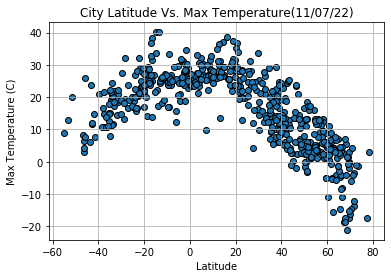

In [24]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Build scatter plot for latitude vs. temperature
plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
            label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

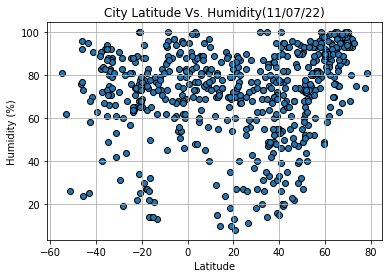

In [29]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

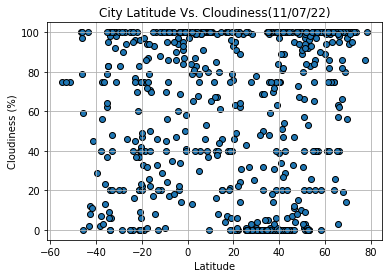

In [28]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
            label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

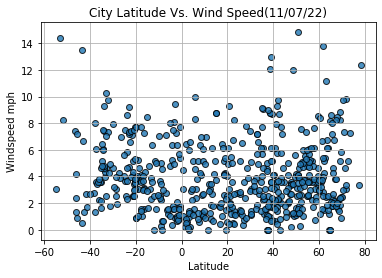

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Wind Speed(%s)" % time.strftime("%x"))
plt.ylabel("Windspeed mph")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [35]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) > 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [36]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]).astype(float) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8462548186825359


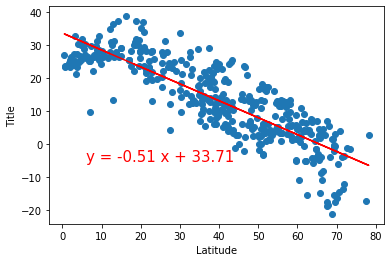

In [38]:
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (6,-5))

The r-squared is: 0.6419546065421795


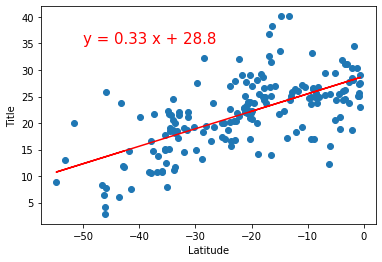

In [40]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plot_linear_regression(x_values,y_values, 'Max Temp', (-50,35))

**Discussion about the linear relationship:** There's a strong negative correlation between temperature and latitude in the northern hemisphere. Whereas, there's a moderately strong positive correlation between temperature and latitude in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.23853179129394048


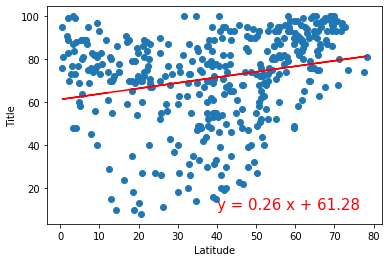

In [41]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.016759316950056787


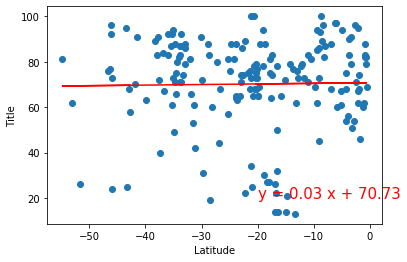

In [44]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plot_linear_regression(x_values,y_values, 'Humidity', (-20,20))

**Discussion about the linear relationship:** There is a weak correlation in both hemispheres between humidity and latitude

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.15500489387697092


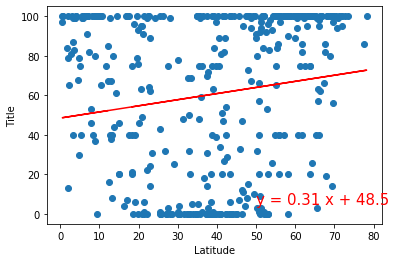

In [47]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (50,5))

The r-squared is: 0.14341322916643248


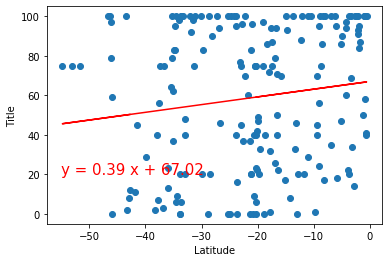

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"]
plot_linear_regression(x_values,y_values, 'Cloudiness', (-55,20))

**Discussion about the linear relationship:** There's also a weak correlation between latitude and cloudiness in both hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.17434667290903336


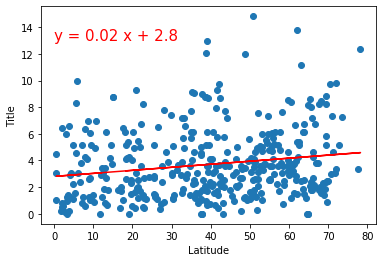

In [52]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (0,13))

The r-squared is: -0.2494775354626458


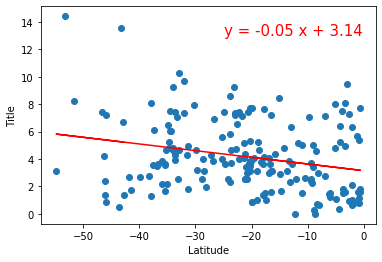

In [56]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plot_linear_regression(x_values,y_values, 'Wind Speed', (-25,13))

**Discussion about the linear relationship:** There's a weak positive correlation between windspeed and latitude in the northern hemisphere and a weak negative correlation in the southern hemisphere